## Objectives:

The objective in the module are the following:

Build intuitions regarding an unknown dataset;
Identify and differentiate numerical and categorical features;
Create an advanced predictive pipeline with scikit-learn.

### First look at our dataset
In this notebook, we will look at the necessary steps required before any machine learning takes place. It involves:

loading the data;
looking at the variables in the dataset, in particular, differentiate between numerical and categorical variables, which need different preprocessing in most machine learning workflows;
visualizing the distribution of the variables to gain some insights into the dataset.

We will load data from the 1994 United States Census that will be from https://www.openml.org/search?type=data&status=active&id=1590

In [58]:
import pandas as pd

adult_census = pd.read_csv("/Users/russconte/Adult_Census.csv")

adult_census.head(5)

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
target_column = "Class"
adult_census["Class"].value_counts()

 <=50K    37155
 >50K     11687
Name: Class, dtype: int64

We see there are more than three times as many instances of <=50K as there are >50K, so the classes are quite imbalanced.

We can check the number of samples adn the number of columns in the data set:

In [60]:
print(
    f"The adult census data set contains {adult_census.shape[0]} samples and " f"{adult_census.shape[1]} columns"
)

The adult census data set contains 48842 samples and 15 columns


Let's look at histograms of the numerical data:

adult_census.hist(figsize=(20,14))

Let's look at the distribution of Occupation in the American Census data set:

In [61]:
adult_census["Occupation"].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: Occupation, dtype: int64

Let's look at the relationship between Education (category) and Education-num:

In [62]:
pd.crosstab(index=adult_census["Education"], columns=adult_census["Education-num"])

Education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


The above chart shows that these two columns are *extremely* highly correlated, and one of them can be removed without damaging the analysis.

### Let's do a pair-plot, to see how the pairs of data look:

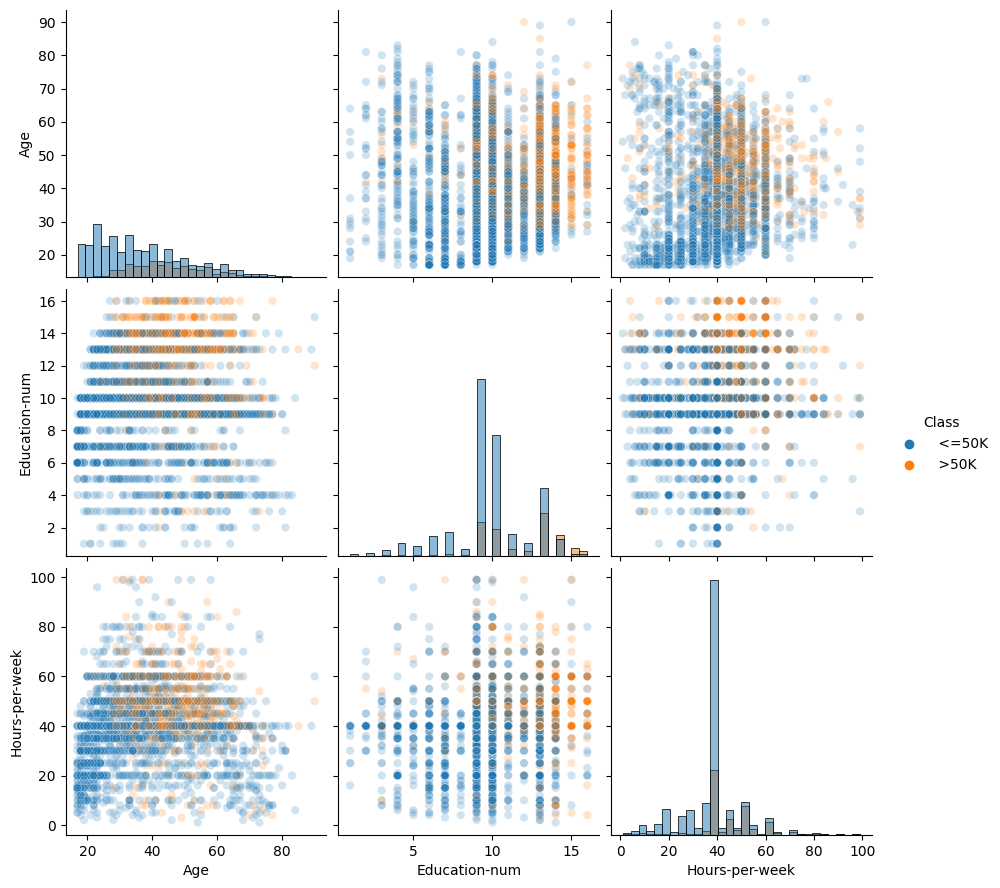

In [63]:
import seaborn as sns

n_samples_to_plot = 5000
columns = ["Age", "Education-num", "Hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

<AxesSubplot: xlabel='Age', ylabel='Hours-per-week'>

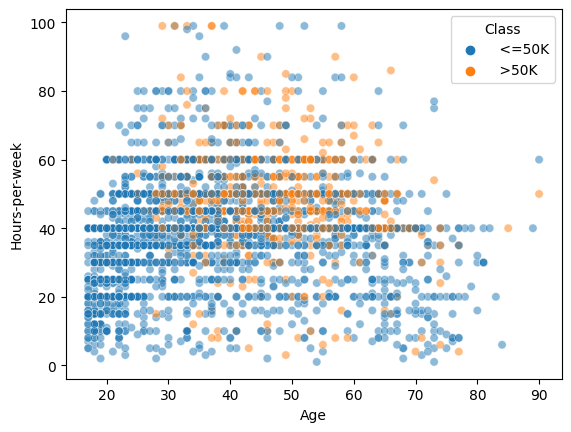

In [64]:
sns.scatterplot(
    x="Age",
    y="Hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

We see that blue points are in the lower left, showing that people earning <=50K tend to be working fewer hours per week.

It's possible to add some lines that will add guidance to our interpretation of the data:

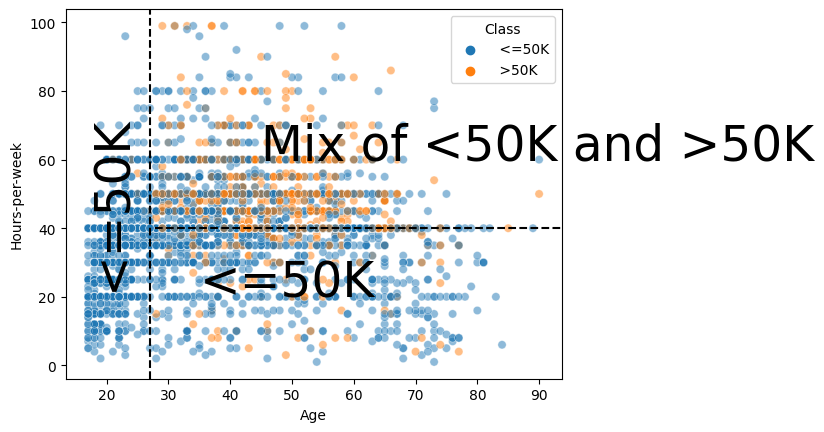

In [65]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="Age",
    y="Hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

Age_limit = 27
plt.axvline(x=Age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("Mix of <50K and >50K", (45, 60), fontsize=35)

In the region age < 27 (left region) the prediction is low-income. Indeed, there are many blue points and we cannot see any orange points.
In the region age > 27 AND hours-per-week < 40 (bottom-right region), the prediction is low-income. Indeed, there are many blue points and only a few orange points.
In the region age > 27 AND hours-per-week > 40 (top-right region), we see a mix of blue points and orange points. It seems complicated to choose which class we should predict in this region.

Notebook Recap

In this notebook we:

loaded the data from a CSV file using pandas;
looked at the different kind of variables to differentiate between categorical and numerical variables;
inspected the data with pandas and seaborn. Data inspection can allow you to decide whether using machine learning is appropriate for your data and to highlight potential peculiarities in your data.
We made important observations (which will be discussed later in more detail):

if your target variable is imbalanced (e.g., you have more samples from one target category than another), you may need special techniques for training and evaluating your machine learning model;
having redundant (or highly correlated) columns can be a problem for some machine learning algorithms;
contrary to decision tree, linear models can only capture linear interactions, so be aware of non-linear relationships in your data.